## Imports

In [1]:
import numpy as np
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt


FIGSIZE= (5, 3)

## Problem 2.6

x_star: 0.6449
Total error: 0.2056


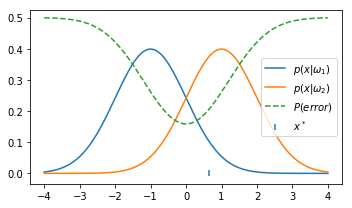

In [2]:
mu1, sigma1= -1, 1
mu2, sigma2= 1, 1

dist1 = stats.norm(loc=mu1, scale=sigma1)
dist2 = stats.norm(loc=mu2, scale=sigma2)
E_1 = 0.05

x_star = mu1 + sigma1 * stats.norm.ppf(1 - E_1)  # ppf = inverse of `cdf`
print(f'x_star: {round(x_star, 4)}')

total_error = 0.5 * (E_1 + stats.norm.cdf((mu1 - mu2)/sigma2 + (sigma1/sigma2) * stats.norm.ppf(1 - E_1)))
print(f'Total error: {round(total_error, 4)}')

x = np.linspace(-4, 4, num=2**8)
bayes_error = 0.5 * ((1 - dist1.cdf(x)) + dist2.cdf(x))

plt.figure(figsize=FIGSIZE)
plt.plot(x, dist1.pdf(x), label='$p(x | \omega_1)$')
plt.plot(x, dist2.pdf(x), label='$p(x | \omega_2)$')
plt.scatter([x_star], [0], label='$x^*$', marker='|')
plt.plot(x, bayes_error, '--', label='$P(error)$')
plt.legend()
plt.tight_layout()
plt.savefig('duda_ch2_prob6.pdf')

## Problem 4.3

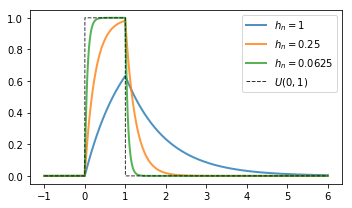

In [8]:
def p_bar(x, a, h_n):
    """
    Function to plot the average p_bar(x),
    given the three cases from the problem.
    """
    y = np.zeros_like(x)
    mask = (0 <= x) & (x <= a)
    y[mask] = ((1 - np.exp(-x / h_n)) /a)[mask]
    
    mask = x >= a
    y[mask] = ((np.exp(a / h_n) - a) * np.exp(-x / h_n) /a)[mask]
    return y

def U(x, a):
    """
    Plot uniform distribution on 0 <= x <= a.
    """
    y = np.zeros_like(x)
    mask = (0 <= x) & (x <= a)
    y[mask] = (np.ones_like(x)/a)[mask]
    return y
    
    
plt.figure(figsize=FIGSIZE) 

x = np.linspace(-1, 6, num=2**14)
for h_n in [1, 1/4, 1/16]:
    plt.plot(x, p_bar(x, a=1, h_n=h_n), label=f'$h_n = {h_n}$', lw=2, alpha=0.8)
    
plt.plot(x, U(x, a=1), 'k--', label=f'$U(0, 1)$', lw=1, alpha=0.8)
plt.legend()
plt.tight_layout()
plt.savefig('duda_ch4_prob3_b.pdf')

/home/tommy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


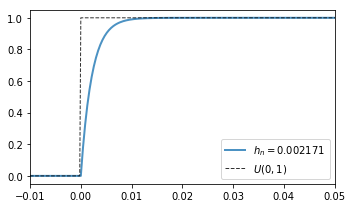

In [9]:
plt.figure(figsize=FIGSIZE) 

a = 1
h_n = a/(100 * np.log(100))

x = np.linspace(-1, 6, num=2**15)
plt.plot(x, p_bar(x, a=a, h_n=h_n), label=f'$h_n = {round(h_n, 6)}$', lw=2, alpha=0.8)
    
plt.plot(x, U(x, a=1), 'k--', label=f'$U(0, 1)$', lw=1, alpha=0.8)
plt.legend()
plt.xlim([-0.01, 0.05])
plt.tight_layout()
plt.savefig('duda_ch4_prob3_d.pdf')